In [1]:
from djangoapp.news.scripts.llm import *

In [2]:
llm = LocalLLM()

In [4]:
import pickle
import pandas as pd
# import data from pickle
df = pd.read_csv('../data/merged_titles_labels.csv')
df.head()


,title,is_clickbait
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [24]:
# select 2500 random samples - 1250 from each class
import random
random.seed(42)
df = df.sample(frac=1).reset_index(drop=True)
df = df.groupby('is_clickbait').head(1250)
df = df.sample(frac=1).reset_index(drop=True)
df.is_clickbait.value_counts()

is_clickbait
0    1250
1    1250
Name: count, dtype: int64

In [ ]:
df['llm_pred'] = None
df

In [18]:
from tqdm.auto import tqdm
import numpy as np
preds = np.array([])
for i in tqdm(range(0, 2500)):
    preds = np.append(preds, llm.predict(df.iloc[i]['title']))
    
df['llm_pred'] = preds

  0%|          | 0/2500 [00:00<?, ?it/s]

In [ ]:
df

In [20]:
from sklearn.metrics import roc_auc_score, f1_score

print(f"ROC AUC: {roc_auc_score(df['is_clickbait'], df['llm_pred'])}")
print(f"F1 Score: {f1_score(df['is_clickbait'], df['llm_pred'] > 0.5)}")

ROC AUC: 0.9341875199999999
F1 Score: 0.8160442600276625


Text(0.5, 1.0, 'ROC Curve')

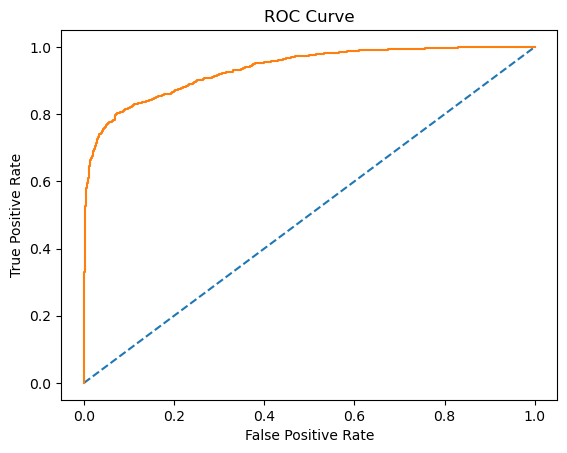

In [23]:
# plot ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(df['is_clickbait'], df['llm_pred'])
# add random line
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# make plot have white background
plt.gca().set_facecolor('w')

plt.title('ROC Curve')
